In [3]:
import pandas as pd

import psycopg2
import pandas.io.sql as sqlio
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [4]:
conn =psycopg2.connect(database ='Energy_Analysis', user='postgres' ,password ='2501', host ='localhost')

In [5]:
query = "select * from tbl_PEV"
PEV_df =sqlio.read_sql_query(query,conn)


In [6]:
PEV_df


,sampno,vehno,year,make,model,fuel,veh_type,pev_miles_week,pev_miles_month,phev_percent,...,pev_incentives_2,pev_incentives_3,pev_incentives_4,pev_incentives_5,pev_incentives_6,pev_incentives_7,pev_experience,pev_recommend,pev_confidence,pev_confidence_4_x
0,190107,1,2017,FORD,REDACTED,3,3,250,,30,...,5,4,4,1,1,4,5,5,,
1,190111,3,2018,VOLKSWAGEN,None,5,1,175,,,...,5,5,5,1,1,4,5,4,,
2,190120,2,2016,NISSAN,None,5,2,160,,,...,4,4,4,2,1,2,7,5,,
3,190127,1,2013,TOYOTA,None,3,3,200,,85,...,7,7,7,2,7,5,7,4,,
4,190138,3,2017,CHEVROLET,None,5,2,200,,,...,5,5,5,1,1,1,7,5,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,194232,1,2016,FORD,None,3,3,200,,20,...,7,7,7,7,1,2,7,5,,
447,194237,1,2013,CHEVROLET,None,3,2,40,,10,...,4,4,4,1,1,1,7,5,,
448,194239,1,2018,TESLA,None,5,3,250,,,...,5,5,7,1,7,4,7,5,,
449,194242,2,2016,TESLA,None,5,3,70,,,...,2,2,2,2,2,2,5,3,,


In [7]:
#PEV_df['Target']=1
#PEV_df

In [8]:
PEV_owners=PEV_df.sampno 
PEV_owners

0      190107
1      190111
2      190120
3      190127
4      190138
        ...  
446    194232
447    194237
448    194239
449    194242
450    194251
Name: sampno, Length: 451, dtype: int64

In [9]:
query = "SELECT * from tbl_dce"
dce_df = sqlio.read_sql_query(query,conn)

In [10]:
dce_df


,sampno,sequence,alt_order,flag_dce_year,alt_1_vehtype,alt_2_vehtype,alt_3_vehtype,alt_4_vehtype,alt_1_fueltype,alt_2_fueltype,...,alt_4_purchincent,alt_1_anncost,alt_2_anncost,alt_3_anncost,alt_4_anncost,alt_1_accel,alt_2_accel,alt_3_accel,alt_4_accel,choice
0,190329,1,"3,1,2,4",2025,8,11,12,3,1,3,...,1,1660,747,996,646,8.5,5.2,5.9,8.9,1
1,190329,2,"3,1,2,4",2025,8,6,8,11,3,1,...,1,1494,799,2075,830,8.1,8.2,8.5,5.5,1
2,190329,3,"3,1,2,4",2025,8,8,9,2,2,8,...,1,2490,1660,1081,1153,7.5,6.8,5.9,8.3,2
3,190329,4,"3,1,2,4",2025,8,8,10,11,8,7,...,1,1660,1037,403,830,10.2,6.5,7.9,5.5,1
4,190329,5,"3,1,2,4",2025,4,4,7,11,2,7,...,1,1844,1153,2213,692,5.1,6.6,6.5,5.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33979,194250,4,"4,1,2,3",2025,8,10,8,4,3,6,...,1,1577,323,2190,1844,8.2,6.3,8.6,7.6,1
33980,194250,5,"4,1,2,3",2025,7,8,7,6,5,3,...,10,1606,1971,999,799,3.8,8.2,5.6,4.7,1
33981,194250,6,"4,1,2,3",2025,7,7,8,3,3,3,...,6,2158,1439,1314,807,3.8,3.8,9.8,6.2,1
33982,194250,7,"4,1,2,3",2025,7,7,3,3,5,6,...,1,1606,799,1937,1614,5.6,4.7,7.2,5.2,1


In [11]:
query = "SELECT * from tbl_main"
main_df = sqlio.read_sql_query(query,conn)

In [12]:
main_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,autonomous_att_8,autonomous_hhveh,autonomous_rideshare,autonomous_pooled,autonomous_pref,housing,housing_1_8_x,solar,solar_future,income
0,192850,4,1,3,1,37,4,1,2,0,...,2,2,3,3,1,1,,2,1,11
1,193449,4,1,3,1,34,6,3,3,0,...,3,2,2,2,3,1,,1,,8
2,193440,4,1,3,1,50,1,1,2,0,...,4,2,3,2,1,1,,2,2,11
3,193133,4,1,4,1,33,2,1,1,0,...,2,2,1,2,3,1,,2,2,7
4,193400,4,1,3,1,1,5,3,3,0,...,4,2,2,2,2,1,,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,190256,2,1,3,1,19,2,2,3,1,...,3,1,3,3,2,1,,2,2,7
4244,191249,5,1,3,1,30,2,3,3,0,...,3,1,3,2,3,1,,1,,9
4245,190327,2,1,3,1,36,2,2,3,0,...,3,2,2,3,3,1,,1,,9
4246,191658,5,1,4,1,19,2,2,3,1,...,3,2,3,3,3,1,,2,2,8


In [13]:
query = "SELECT * from tbl_person"
person_df = sqlio.read_sql_query(query,conn)

In [14]:
person_df

,sampno,perid,perno,relationship,gender,employment,student,education,license,vehno,...,school_distance,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x
0,190001,190001.p01,1,8,1,4,4,6,1,190001.v01,...,,2,0,0,0,0,1,0,0,
1,190003,190003.p01,1,8,2,4,4,8,1,190003.v01,...,,2,0,0,0,0,1,0,0,
2,190002,190002.p01,1,8,2,4,4,1,2,,...,,2,0,0,0,0,1,0,0,
3,190005,190005.p01,1,8,1,4,4,6,1,190005.v02,...,,2,0,0,0,0,1,0,0,
4,190002,190002.p02,2,1,1,1,4,2,1,,...,,2,0,0,0,0,1,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8360,190802,190802.p02,2,1,2,4,4,8,1,190802.v03,...,,2,0,0,0,0,1,0,0,
8361,190845,190845.p01,1,8,2,2,4,5,1,190845.v01,...,,2,0,0,0,0,1,0,0,
8362,190803,190803.p01,1,8,2,1,4,8,1,190803.v01,...,,2,0,0,0,0,1,0,0,
8363,190806,190806.p01,1,8,1,1,4,2,1,190806.v01,...,,1,0,0,0,0,1,0,0,


In [15]:
query = "SELECT * from tbl_vehicle"
vehicle_df = sqlio.read_sql_query(query,conn)

In [16]:
vehicle_df


,sampno,vehno,vehicle_num,num_hh_vehicles,year,make,make_other,make_clean,model,model_other,...,personal_miles,business_miles,company_primary_driver,company_primary_driver_id,other_drivers,behavior_1,behavior_2,behavior_3,behavior_4,behavior_5
0,190001,1,1,1,1998,TOYOTA,,TOYOTA,REDACTED,REDACTED,...,,,,,,,,,,
1,190003,1,1,2,2015,LEXUS,,LEXUS,None,None,...,,,,,,,,,,
2,190005,2,2,2,2002,CHRYSLER,,CHRYSLER,None,None,...,,,,,,,,,,
3,190006,1,1,2,2018,TOYOTA,,TOYOTA,None,None,...,,,,,,,,,,
4,190009,3,3,3,2002,HONDA,,HONDA,None,None,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,192322,2,2,2,2013,SUBARU,,SUBARU,None,None,...,,,,,,,,,,
8045,192327,2,2,2,2018,TESLA,,TESLA,None,None,...,,,,,,,,,,
8046,192334,4,4,4,2013,SCION,,SCION,None,None,...,,,,,,,,,,
8047,192330,2,2,2,2015,FORD,,FORD,None,None,...,,,,,,,,,,


In [17]:
#add ev_flag column
vehicle_df['ev_flag'] = 0

vehicle_df.loc[vehicle_df['fuel_clean'] == 3,'ev_flag'] = 1
vehicle_df.loc[vehicle_df['fuel_clean'] == 5,'ev_flag'] = 1
vehicle_df                                 

,sampno,vehno,vehicle_num,num_hh_vehicles,year,make,make_other,make_clean,model,model_other,...,business_miles,company_primary_driver,company_primary_driver_id,other_drivers,behavior_1,behavior_2,behavior_3,behavior_4,behavior_5,ev_flag
0,190001,1,1,1,1998,TOYOTA,,TOYOTA,REDACTED,REDACTED,...,,,,,,,,,,0
1,190003,1,1,2,2015,LEXUS,,LEXUS,None,None,...,,,,,,,,,,0
2,190005,2,2,2,2002,CHRYSLER,,CHRYSLER,None,None,...,,,,,,,,,,0
3,190006,1,1,2,2018,TOYOTA,,TOYOTA,None,None,...,,,,,,,,,,0
4,190009,3,3,3,2002,HONDA,,HONDA,None,None,...,,,,,,,,,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,192322,2,2,2,2013,SUBARU,,SUBARU,None,None,...,,,,,,,,,,0
8045,192327,2,2,2,2018,TESLA,,TESLA,None,None,...,,,,,,,,,,1
8046,192334,4,4,4,2013,SCION,,SCION,None,None,...,,,,,,,,,,0
8047,192330,2,2,2,2015,FORD,,FORD,None,None,...,,,,,,,,,,0


In [18]:
vehicle_df.sampno.nunique()

4136

In [19]:
#df1.merge(df2, how='inner', on='a')

In [20]:
list(main_df)

['sampno',
 'source',
 'language',
 'age_grp',
 'california',
 'county',
 'region',
 'future_decision_role',
 'num_hh_vehicles',
 'household_members_1',
 'household_members_2',
 'household_members_3',
 'household_members_4',
 'tot_hh_members',
 'hybrid_experience',
 'past_hybrid',
 'phev_experience',
 'past_phev',
 'bev_experience',
 'past_bev',
 'fcv_experience',
 'past_fcv',
 'charge_spots',
 'charge_work',
 'home_parking_1',
 'home_parking_2',
 'home_parking_3',
 'home_parking_4',
 'home_parking_5',
 'home_parking_6',
 'home_parking_7',
 'home_parking_8',
 'home_parking_9',
 'home_parking_8_x',
 'home_electricity_access',
 'hydrogen_station_awareness',
 'hsa_distance_1_1_x',
 'hsa_distance_1_2_x',
 'future_purchase',
 'next_purchase',
 'purchase_timing',
 'modes_used_1',
 'modes_used_2',
 'modes_used_3',
 'modes_used_4',
 'modes_used_5',
 'modes_used_6',
 'modes_used_7',
 'modes_used_8',
 'modes_used_9',
 'modes_used_10',
 'modes_used_11',
 'modes_used_12',
 'mode_freq_1',
 'mode_fr

In [21]:
merged_df =main_df.merge(person_df, how='inner', on='sampno') 

In [22]:
merged_df


,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,school_distance,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x
0,192850,4,1,3,1,37,4,1,2,0,...,,2,0,0,0,0,1,0,0,
1,192850,4,1,3,1,37,4,1,2,0,...,,2,0,0,0,0,1,0,0,
2,192850,4,1,3,1,37,4,1,2,0,...,,2,0,0,0,0,1,0,0,
3,193449,4,1,3,1,34,6,3,3,0,...,,1,0,0,0,0,1,0,0,
4,193440,4,1,3,1,50,1,1,2,0,...,,2,0,0,0,0,1,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8360,190327,2,1,3,1,36,2,2,3,0,...,,2,0,0,0,0,1,0,0,
8361,191658,5,1,4,1,19,2,2,3,1,...,,2,0,0,0,0,1,0,0,
8362,191658,5,1,4,1,19,2,2,3,1,...,,2,0,0,0,0,1,0,0,
8363,191658,5,1,4,1,19,2,2,3,1,...,,2,0,0,0,0,1,0,0,


In [23]:
main_df.sampno.nunique()


4248

In [24]:
#how much fuel charge left when you plug in? When the low battery light comes on
#1=When the low battery light comes on
#2=1/8 of a full charge
#3=1/4 of a full charge
#4=1/2 of a full charge
#5 =More than 1/2 of a full charge

list(PEV_df.recharge_amount)



[' ',
 '5',
 '5',
 ' ',
 '4',
 '4',
 '3',
 '3',
 '4',
 '5',
 '2',
 '3',
 '4',
 ' ',
 '5',
 '2',
 '4',
 '5',
 '3',
 ' ',
 ' ',
 '4',
 '2',
 '3',
 '2',
 '5',
 ' ',
 '2',
 ' ',
 '2',
 ' ',
 ' ',
 '2',
 '3',
 ' ',
 ' ',
 ' ',
 '3',
 ' ',
 ' ',
 '2',
 '4',
 '3',
 ' ',
 ' ',
 '2',
 '2',
 ' ',
 ' ',
 ' ',
 ' ',
 '3',
 ' ',
 ' ',
 '3',
 ' ',
 '5',
 ' ',
 '2',
 ' ',
 '5',
 '3',
 '4',
 '3',
 '3',
 '4',
 '5',
 ' ',
 ' ',
 ' ',
 '3',
 '4',
 '4',
 '4',
 '4',
 ' ',
 '5',
 '3',
 '3',
 '4',
 '3',
 ' ',
 ' ',
 '4',
 '3',
 ' ',
 ' ',
 ' ',
 '4',
 '2',
 '3',
 '3',
 ' ',
 '3',
 '3',
 '3',
 '5',
 '4',
 '2',
 '3',
 ' ',
 '4',
 '1',
 '3',
 ' ',
 '1',
 '4',
 ' ',
 '3',
 '5',
 ' ',
 '3',
 ' ',
 ' ',
 ' ',
 '4',
 ' ',
 '4',
 '5',
 '5',
 '5',
 '2',
 ' ',
 ' ',
 '3',
 '3',
 '3',
 '5',
 '4',
 ' ',
 '3',
 ' ',
 ' ',
 ' ',
 '3',
 ' ',
 '3',
 '2',
 '2',
 '2',
 '4',
 ' ',
 ' ',
 '4',
 ' ',
 ' ',
 '3',
 '3',
 '2',
 ' ',
 '3',
 ' ',
 '5',
 ' ',
 ' ',
 ' ',
 ' ',
 '3',
 '5',
 '4',
 '2',
 ' ',
 ' ',
 '4',
 ' ',
 '2',
 '2'

In [25]:
PEV_df["recharge_amount"]= pd.to_numeric(PEV_df["recharge_amount"], errors='coerce')

PEV_df["recharge_amount"]

0      NaN
1      5.0
2      5.0
3      NaN
4      4.0
      ... 
446    NaN
447    NaN
448    3.0
449    3.0
450    3.0
Name: recharge_amount, Length: 451, dtype: float64

<AxesSubplot:>

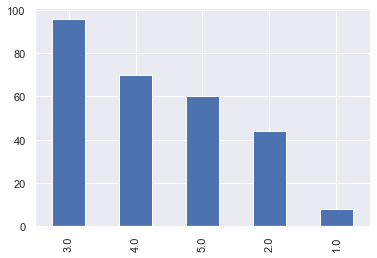

In [26]:
#how much fuel charge left when you plug in? When the low battery light comes on
#1=When the low battery light comes on
#2=1/8 of a full charge
#3=1/4 of a full charge
#4=1/2 of a full charge
#5 =More than 1/2 of a full charge
PEV_df["recharge_amount"].value_counts().plot.bar()

<AxesSubplot:ylabel='recharge_amount'>

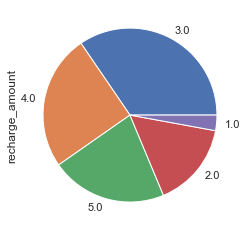

In [27]:
PEV_df["recharge_amount"].value_counts().plot.pie()

In [28]:
#Get respondents demographics
#person_df relationship 8 = self.
respondent_df = person_df.loc[person_df["relationship"]==8]
respondent_df


,sampno,perid,perno,relationship,gender,employment,student,education,license,vehno,...,school_distance,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x
0,190001,190001.p01,1,8,1,4,4,6,1,190001.v01,...,,2,0,0,0,0,1,0,0,
1,190003,190003.p01,1,8,2,4,4,8,1,190003.v01,...,,2,0,0,0,0,1,0,0,
2,190002,190002.p01,1,8,2,4,4,1,2,,...,,2,0,0,0,0,1,0,0,
3,190005,190005.p01,1,8,1,4,4,6,1,190005.v02,...,,2,0,0,0,0,1,0,0,
9,190004,190004.p01,1,8,2,4,1,4,2,,...,5,1,0,0,0,0,1,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8358,190792,190792.p01,1,8,1,1,4,6,1,190792.v02,...,,2,0,0,0,0,0,0,1,
8359,190795,190795.p01,1,8,2,1,4,8,1,190795.v01,...,,2,0,0,0,0,0,0,1,
8361,190845,190845.p01,1,8,2,2,4,5,1,190845.v01,...,,2,0,0,0,0,1,0,0,
8362,190803,190803.p01,1,8,2,1,4,8,1,190803.v01,...,,2,0,0,0,0,1,0,0,


In [29]:
respondent_merged_df = main_df.merge(respondent_df, how='left', on='sampno') 
respondent_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,school_distance,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x
0,192850,4,1,3,1,37,4,1,2,0,...,,2,0,0,0,0,1,0,0,
1,193449,4,1,3,1,34,6,3,3,0,...,,1,0,0,0,0,1,0,0,
2,193440,4,1,3,1,50,1,1,2,0,...,,2,0,0,0,0,1,0,0,
3,193133,4,1,4,1,33,2,1,1,0,...,,2,0,0,0,0,1,0,0,
4,193400,4,1,3,1,1,5,3,3,0,...,,2,0,1,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,190256,2,1,3,1,19,2,2,3,1,...,,1,0,0,0,0,1,0,0,
4244,191249,5,1,3,1,30,2,3,3,0,...,,2,0,1,0,0,0,0,0,
4245,190327,2,1,3,1,36,2,2,3,0,...,,2,0,0,0,0,1,0,0,
4246,191658,5,1,4,1,19,2,2,3,1,...,,2,0,0,0,0,1,0,0,


In [30]:
list(respondent_merged_df)
    

['sampno',
 'source',
 'language',
 'age_grp',
 'california',
 'county',
 'region',
 'future_decision_role',
 'num_hh_vehicles',
 'household_members_1',
 'household_members_2',
 'household_members_3',
 'household_members_4',
 'tot_hh_members',
 'hybrid_experience',
 'past_hybrid',
 'phev_experience',
 'past_phev',
 'bev_experience',
 'past_bev',
 'fcv_experience',
 'past_fcv',
 'charge_spots',
 'charge_work',
 'home_parking_1',
 'home_parking_2',
 'home_parking_3',
 'home_parking_4',
 'home_parking_5',
 'home_parking_6',
 'home_parking_7',
 'home_parking_8',
 'home_parking_9',
 'home_parking_8_x',
 'home_electricity_access',
 'hydrogen_station_awareness',
 'hsa_distance_1_1_x',
 'hsa_distance_1_2_x',
 'future_purchase',
 'next_purchase',
 'purchase_timing',
 'modes_used_1',
 'modes_used_2',
 'modes_used_3',
 'modes_used_4',
 'modes_used_5',
 'modes_used_6',
 'modes_used_7',
 'modes_used_8',
 'modes_used_9',
 'modes_used_10',
 'modes_used_11',
 'modes_used_12',
 'mode_freq_1',
 'mode_fr

In [31]:
print(respondent_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())


race_1      92
race_2     640
race_3     162
race_4      36
race_5    2978
race_6     176
race_7     315
dtype: int64


<AxesSubplot:>

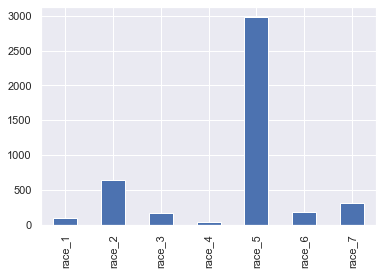

In [32]:
#Race of respondents What is this person's race?: American Indian or Alaska Native

#1 American Indian or Alaska Native

#2 Asian

#3 Black or African American

#4 Native Hawaiian or Other Pacific Islander

#5 White

#6 Other, please specify

#7 Prefer not to answer

(respondent_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum()).plot.bar()

<AxesSubplot:ylabel='None'>

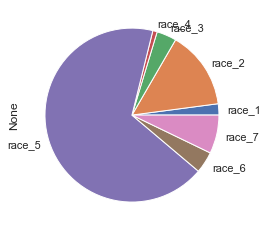

In [33]:
(respondent_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum()).plot.pie()

<AxesSubplot:ylabel='ethnicity'>

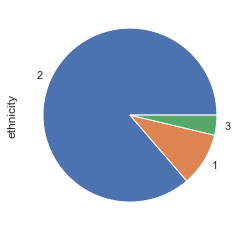

In [34]:
#Hispanic? 1 =yes, 2 =No, 3 =not tellin'
respondent_merged_df['ethnicity'].value_counts().plot.pie()

In [35]:
PEV_owners.tolist()


[190107,
 190111,
 190120,
 190127,
 190138,
 190140,
 190143,
 190145,
 190147,
 190153,
 190167,
 190173,
 190177,
 190178,
 190192,
 190193,
 190207,
 190209,
 190213,
 190217,
 190237,
 190239,
 190252,
 190256,
 190263,
 190268,
 190272,
 190273,
 190276,
 190277,
 190291,
 190293,
 190306,
 190309,
 190317,
 190316,
 190325,
 190327,
 190330,
 190336,
 190343,
 190344,
 190350,
 190351,
 190357,
 190358,
 190378,
 190384,
 190661,
 190808,
 190421,
 190420,
 190419,
 190429,
 190427,
 190578,
 190434,
 190452,
 190442,
 190464,
 190475,
 190484,
 190496,
 190506,
 190516,
 190539,
 190541,
 190543,
 190556,
 190557,
 190566,
 190669,
 190567,
 190571,
 190580,
 190618,
 190597,
 190849,
 190617,
 191872,
 190620,
 190623,
 190630,
 190627,
 190629,
 190639,
 190642,
 190643,
 190650,
 190658,
 190670,
 190678,
 190664,
 190676,
 190683,
 190690,
 190692,
 190702,
 190721,
 190719,
 190746,
 190749,
 190751,
 190787,
 190778,
 190804,
 190809,
 190812,
 190839,
 190824,
 190828,
 

In [36]:
len(PEV_owners)

451

In [37]:
#Our target are the PEV_owners.  Add new column to main based on this list.
respondent_merged_df["PEV owner"] =0

In [38]:

#if sampno is in PEV_owners add 1 to 'PEV owner'
for owner in PEV_owners:
    respondent_merged_df.loc[respondent_merged_df.sampno == owner,'PEV owner'] = 1

In [39]:
#Seperate df for PEV's and non PEVS
owner_merged_df =respondent_merged_df.loc[respondent_merged_df['PEV owner'] == 1]
owner_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x,PEV owner
40,192569,4,1,3,1,31,6,2,4,0,...,2,0,0,0,0,1,0,0,,1
41,192756,4,1,3,1,37,4,1,2,0,...,2,0,0,0,0,1,0,0,,1
105,192597,4,1,3,1,7,5,2,2,0,...,2,0,0,0,0,1,0,0,,1
129,192047,4,1,3,1,1,5,2,3,0,...,2,0,0,0,0,1,0,0,,1
132,192359,4,1,4,1,40,3,3,2,0,...,2,0,0,0,0,1,0,0,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4240,194031,5,1,2,1,19,2,1,3,0,...,2,0,0,0,0,1,0,0,,1
4241,190293,2,1,3,1,37,4,3,3,0,...,2,0,1,0,0,0,0,0,,1
4242,190650,5,1,3,1,27,3,1,3,0,...,2,0,0,0,0,1,0,0,,1
4243,190256,2,1,3,1,19,2,2,3,1,...,1,0,0,0,0,1,0,0,,1


In [40]:
nonowner_merged_df =respondent_merged_df.loc[respondent_merged_df['PEV owner'] == 0]
nonowner_merged_df

,sampno,source,language,age_grp,california,county,region,future_decision_role,num_hh_vehicles,household_members_1,...,ethnicity,race_1,race_2,race_3,race_4,race_5,race_6,race_7,race_6_x,PEV owner
0,192850,4,1,3,1,37,4,1,2,0,...,2,0,0,0,0,1,0,0,,0
1,193449,4,1,3,1,34,6,3,3,0,...,1,0,0,0,0,1,0,0,,0
2,193440,4,1,3,1,50,1,1,2,0,...,2,0,0,0,0,1,0,0,,0
3,193133,4,1,4,1,33,2,1,1,0,...,2,0,0,0,0,1,0,0,,0
4,193400,4,1,3,1,1,5,3,3,0,...,2,0,1,0,0,0,0,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4238,191231,5,1,4,1,30,2,3,2,0,...,2,0,0,0,0,1,0,0,,0
4239,190906,5,1,3,1,1,5,3,6,0,...,2,0,0,0,0,1,0,0,,0
4244,191249,5,1,3,1,30,2,3,3,0,...,2,0,1,0,0,0,0,0,,0
4246,191658,5,1,4,1,19,2,2,3,1,...,2,0,0,0,0,1,0,0,,0


<AxesSubplot:ylabel='None'>

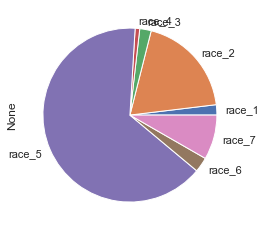

In [41]:
own_by_race_pie=(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum()).plot.pie()
own_by_race_pie

In [42]:
labels = "American Indian or Alaska Native","Asian","Black or African American","Pacific Islander","White","Other","Prefer not to say"
explode = (0.0, 0,0.,0,0.1,0,0)

data =(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())

Text(0.5, 1.0, 'Surveyed EV Owners By Race')

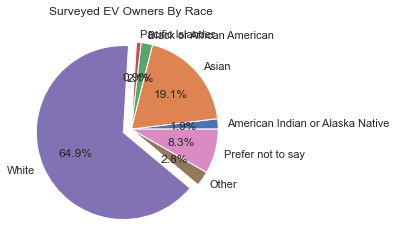

In [43]:
plt.pie(data,explode=explode,labels=labels,autopct="%.1f%%");
plt.title('Surveyed EV Owners By Race')

<AxesSubplot:ylabel='None'>

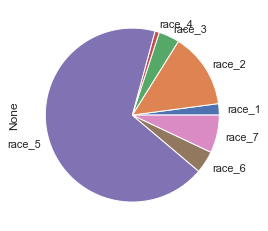

In [44]:
no_own_by_race_plt=(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum()).plot.pie()
no_own_by_race_plt

Text(0.5, 1.0, 'Surveyed Non-EV Owners By Race')

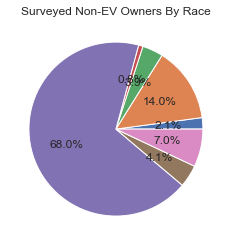

In [45]:
labels = "American Indian or Alaska Native","Asian","Black or African American","Pacific Islander","White","Other","Prefer not to say"
data_no_own=(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
plt.pie(data_no_own,autopct="%.1f%%");
plt.title('Surveyed Non-EV Owners By Race')

# Demographic Comparison between our EV and non-EV owning responders. 

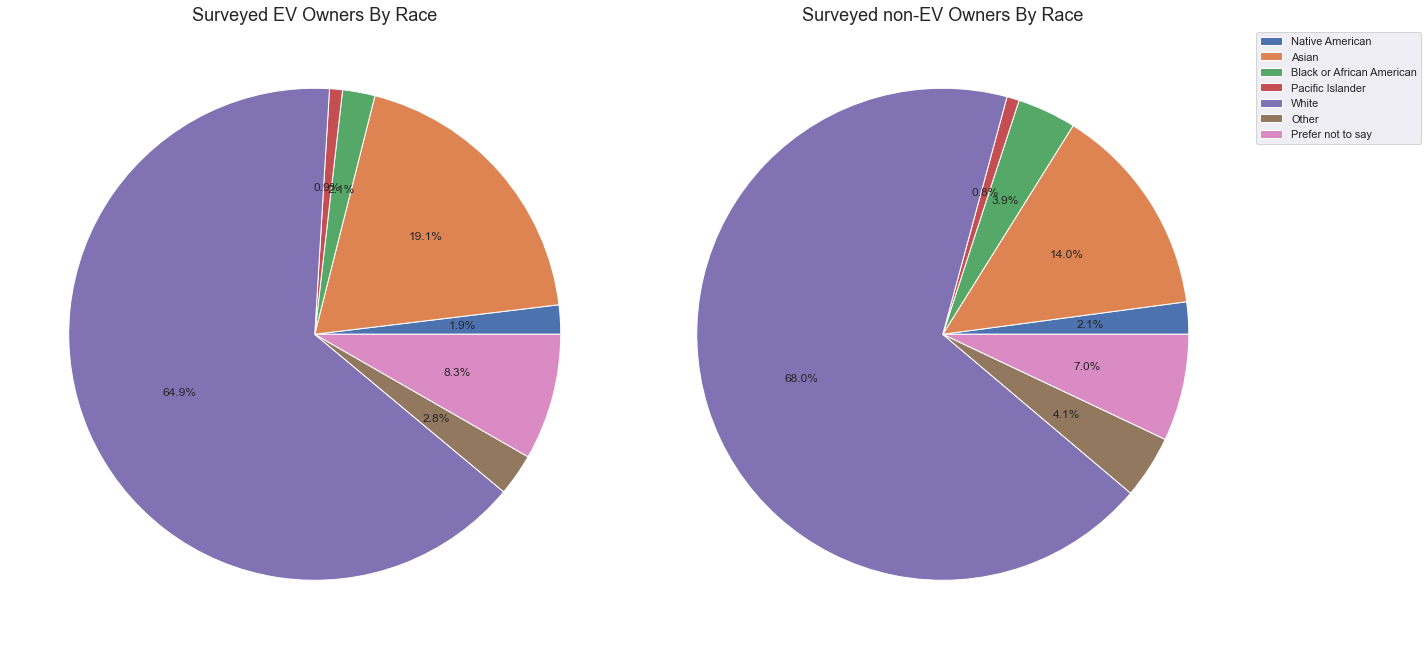

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies
explode=explode
labels = "Native American","Asian","Black or African American","Pacific Islander","White","Other","Prefer not to say"
values =(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Race', fontsize=18)


values =(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
ax2.pie(values,autopct = '%1.1f%%') #plot second pie
#ax2.title('Surveyed non-EV Owners By Race')
ax2.legend(labels,bbox_to_anchor=(1, 1))
#plt.figtext(1,1,'Surveyed EV Owners v non-EV Owners By Race', fontsize=18, ha='center')
ax2.set_title('Surveyed non-EV Owners By Race', fontsize=18)
plt.tight_layout()

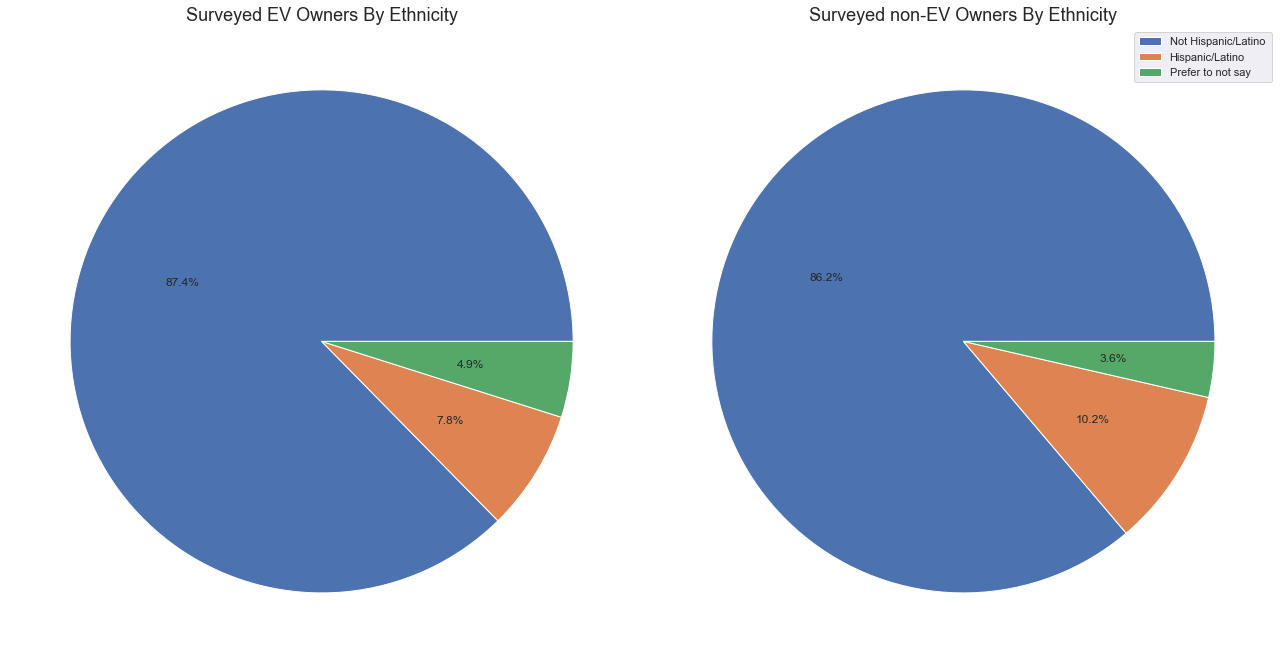

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies
labels=  "Not Hispanic/Latino ","Hispanic/Latino","Prefer to not say"

values =(owner_merged_df['ethnicity'].value_counts())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Ethnicity', fontsize=18)

values =(nonowner_merged_df['ethnicity'].value_counts())
ax2.pie(values,autopct = '%1.1f%%') #plot first pie
ax2.set_title('Surveyed non-EV Owners By Ethnicity', fontsize=18)
ax2.legend(labels,bbox_to_anchor=(1, 1))
plt.tight_layout()

In [49]:
values =(owner_merged_df['ethnicity'].value_counts())
values

2    394
1     35
3     22
Name: ethnicity, dtype: int64

In [50]:
#1=Under 18 years old, 2=18 to 34, 3=35 to 64, 4=65 or older

owner_merged_df['age_grp'].value_counts()

3    288
4    111
2     52
Name: age_grp, dtype: int64

In [51]:
nonowner_merged_df['age_grp'].value_counts()

3    1958
4    1363
2     476
Name: age_grp, dtype: int64

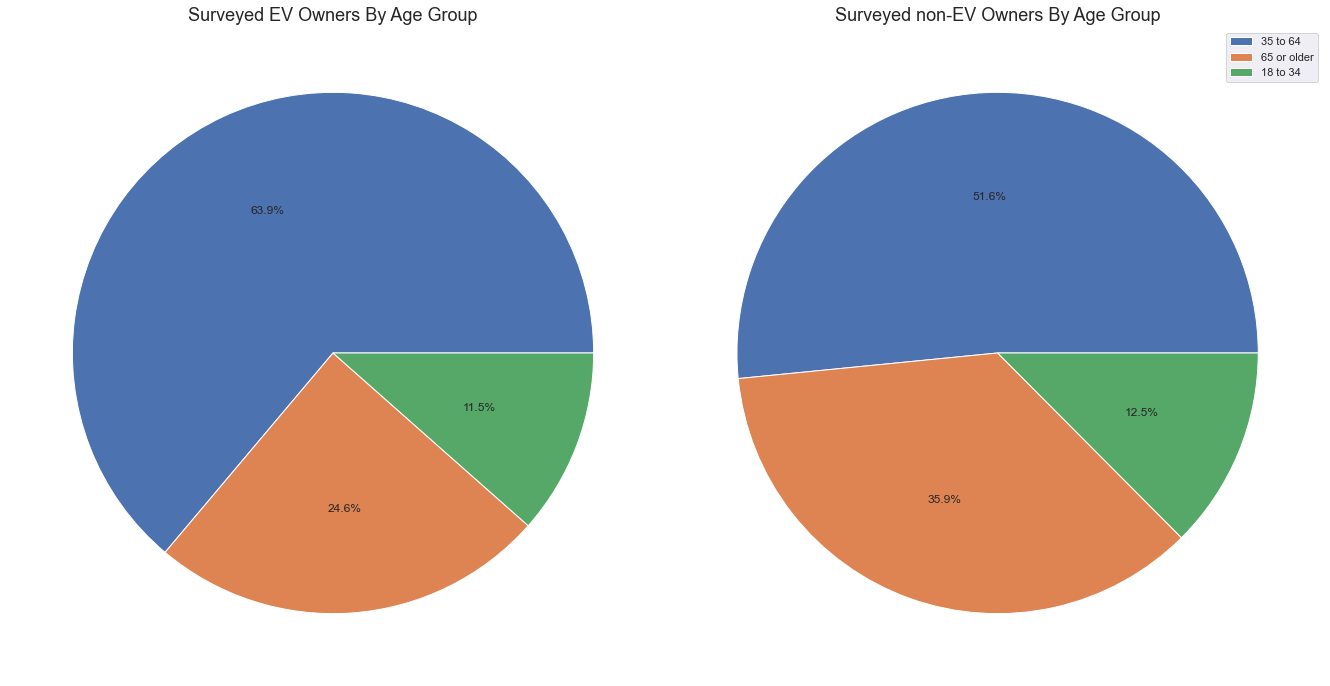

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies
labels=  "35 to 64 ","65 or older","18 to 34"

values =(owner_merged_df['age_grp'].value_counts())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Age Group', fontsize=18)

values =(nonowner_merged_df['age_grp'].value_counts())
ax2.pie(values,autopct = '%1.1f%%') #plot first pie
ax2.set_title('Surveyed non-EV Owners By Age Group', fontsize=18)
ax2.legend(labels,bbox_to_anchor=(1, 1))
plt.tight_layout()

In [53]:
#population pyramid seaborn

# Donut charts

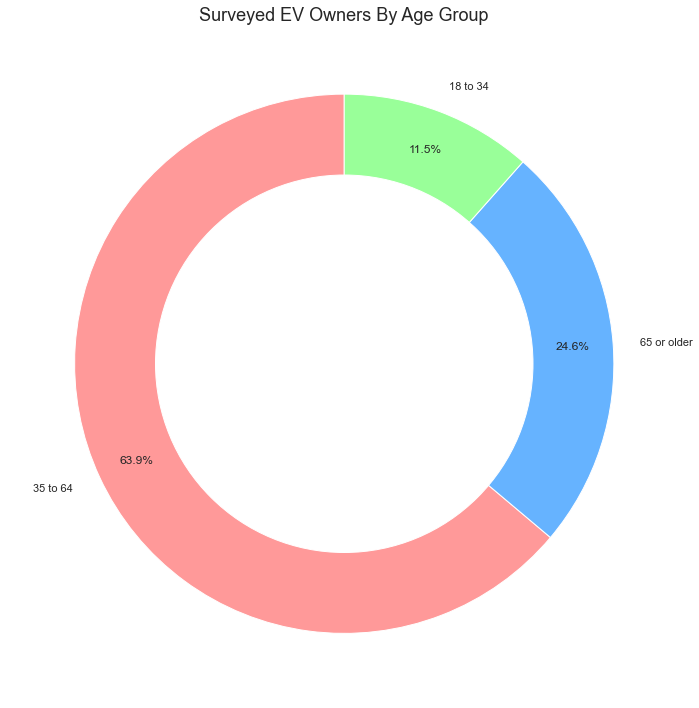

In [54]:
import matplotlib.pyplot as plt
# Pie chart
fig, ax = plt.subplots(1,figsize=(10,10)) #ax1,ax2 refer to your two pies
labels = ["35 to 64 ","65 or older","18 to 34"]
values =(owner_merged_df['age_grp'].value_counts())
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.0,0.0,0.00)
 
ax.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.set_title('Surveyed EV Owners By Age Group', fontsize=18)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.tight_layout()
plt.show()

# Population Age pyramids

In [55]:
df1 = pd.DataFrame({'Age': ['18-34','35-64','65+'], 
                    'EV Owners': [11.5,63.9,24.6], 
                    'Non-EV Owners': [12.5,51.6,35.9]})
df1

,Age,EV Owners,Non-EV Owners
0,18-34,11.5,12.5
1,35-64,63.9,51.6
2,65+,24.6,35.9


[Text(0.5, 0, 'Percentage'),
 Text(0, 0.5, 'Age-Group'),
 Text(0.5, 1.0, 'Population Pyramid')]

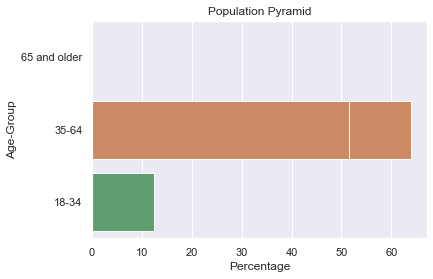

In [56]:



AgeClass = ['65 and older','35-64','18-34']

bar_plot = sns.barplot(data=df1,x='EV Owners', y='Age', order=AgeClass)

bar_plot = sns.barplot(data=df1,x='Non-EV Owners', y='Age',  order=AgeClass)

bar_plot.set(xlabel="Percentage", ylabel="Age-Group", title = "Population Pyramid")

#sns.barplot(data=testdata, x='count',y='age',
          #  hue='gender',orient='horizontal', 
           # dodge=False)


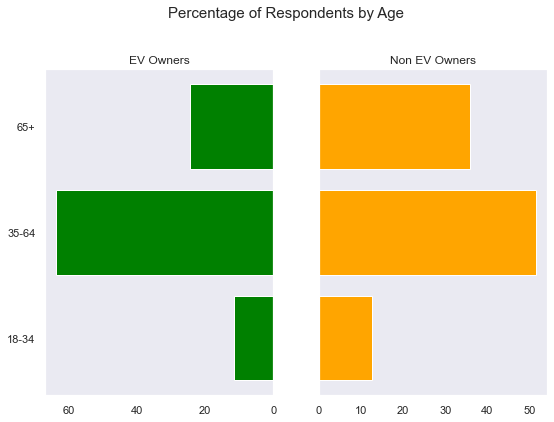

In [58]:
#define x and y limits
y = range(0, len(df1))
x_EV = df1['EV Owners']
x_nonEV = df1['Non-EV Owners']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:white')
plt.figtext(.5,1.0,"Percentage of Respondents by Age ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_EV, align='center', color='green')
axes[0].set(title='EV Owners')
axes[1].barh(y, x_nonEV, align='center', color='orange')
axes[1].set(title='Non EV Owners')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df1['Age'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

C:\Users\happy\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: 'AxesSubplot' object does not support item assignment

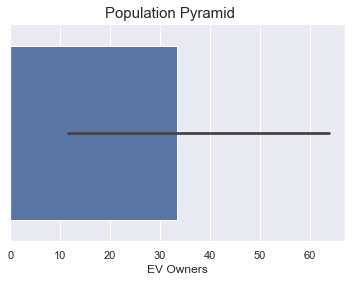

In [59]:
#in Seaborn
#ax = sns.barplot(x="day", y="total_bill", data=tips)
#define x and y limits
y = range(0, len(df1))
x_EV = df1['EV Owners']
x_nonEV = df1['Non-EV Owners']
#define plot parameters
#fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
#fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define male and female bars
ax[0] = sns.barplot( x_EV )
ax[0].set(title='EV Owners')
ax[1] =sns.barplot(x_nonEV )
ax[1].set(title='Non EV Owners')

#adjust grid parameters and specify labels for y-axis
ax[1].grid()
ax[0].set(yticks=y, yticklabels=df['Age'])
ax[0].invert_xaxis()
ax[0].grid()

#display plot
plt.show()

In [60]:
#--------------------------------------------
list(respondent_merged_df)

['sampno',
 'source',
 'language',
 'age_grp',
 'california',
 'county',
 'region',
 'future_decision_role',
 'num_hh_vehicles',
 'household_members_1',
 'household_members_2',
 'household_members_3',
 'household_members_4',
 'tot_hh_members',
 'hybrid_experience',
 'past_hybrid',
 'phev_experience',
 'past_phev',
 'bev_experience',
 'past_bev',
 'fcv_experience',
 'past_fcv',
 'charge_spots',
 'charge_work',
 'home_parking_1',
 'home_parking_2',
 'home_parking_3',
 'home_parking_4',
 'home_parking_5',
 'home_parking_6',
 'home_parking_7',
 'home_parking_8',
 'home_parking_9',
 'home_parking_8_x',
 'home_electricity_access',
 'hydrogen_station_awareness',
 'hsa_distance_1_1_x',
 'hsa_distance_1_2_x',
 'future_purchase',
 'next_purchase',
 'purchase_timing',
 'modes_used_1',
 'modes_used_2',
 'modes_used_3',
 'modes_used_4',
 'modes_used_5',
 'modes_used_6',
 'modes_used_7',
 'modes_used_8',
 'modes_used_9',
 'modes_used_10',
 'modes_used_11',
 'modes_used_12',
 'mode_freq_1',
 'mode_fr

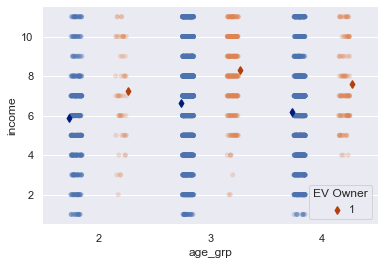

In [61]:

# "Melt" the dataset to "long-form" or "tidy" representation
#iris = pd.melt(iris, "species", var_name="measurement")
#data=pd.melt(respondent_merged_df,)
data= respondent_merged_df
# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="age_grp", y="income", hue="PEV owner",
              data=data, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="age_grp", y="income", hue="PEV owner",
              data=data, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="EV Owner",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

In [63]:
(owner_merged_df['income'].value_counts())

10    88
7     79
8     72
9     56
6     53
11    48
5     38
4     10
3      4
2      3
Name: income, dtype: int64

In [65]:
(nonowner_merged_df['income'].value_counts())

7     700
6     562
5     560
8     358
4     344
11    327
2     232
10    229
3     217
9     209
1      59
Name: income, dtype: int64

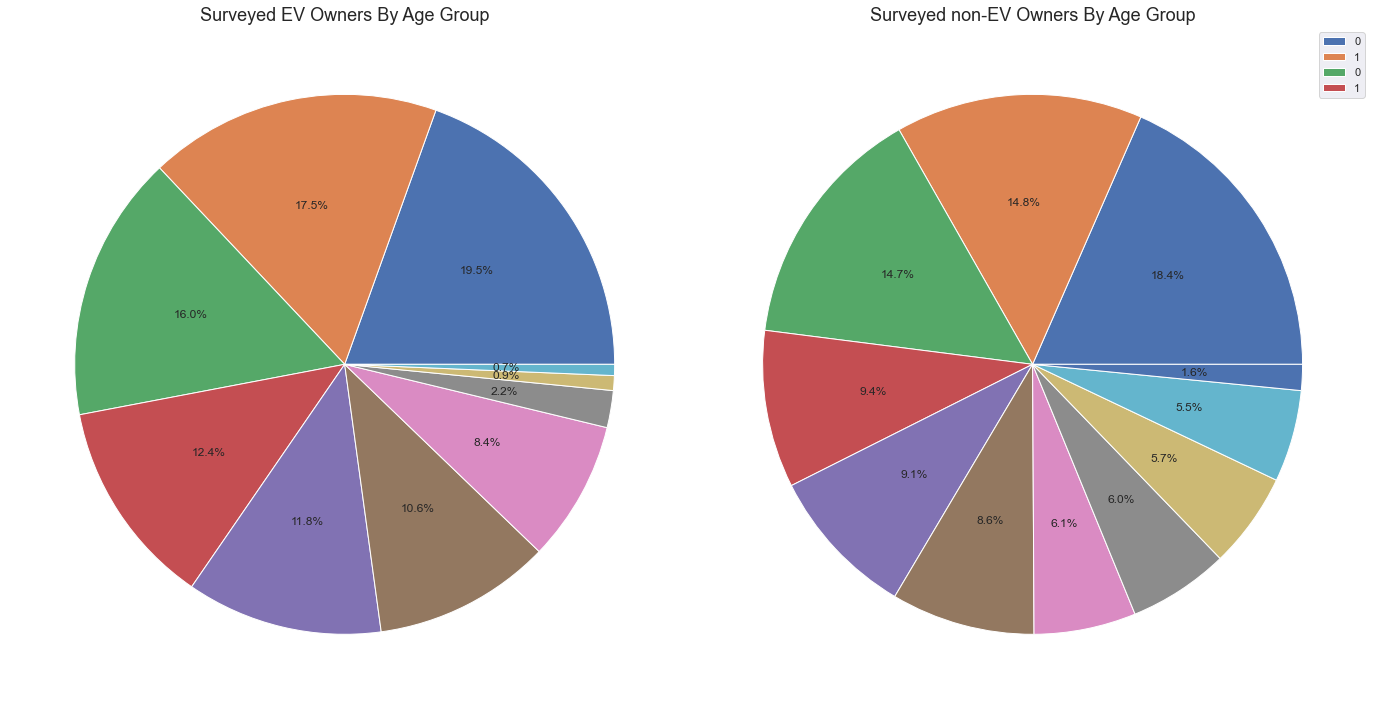

In [66]:
#Check labels!!!!!!!!!!!!!!!!!!!!!!!!!!!!
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,20)) #ax1,ax2 refer to your two pies
#labels= "Less than $9,999",
#"$10,000 to $24,999",
#"$25,000 to $34,999",
#"$35,000 to $49,999",
#"$50,000 to $74,999",
#"$75,000 to $99,999",
#"$100,000 to $149,999",
#"$150,000 to $199,999",
#"$200,000 to $249,999",
#"$250,000 or more",
#"Prefer not to answer"
 
#labels= owner_merged_df['income'].value()
values =(owner_merged_df['income'].value_counts())
ax1.pie(values,autopct = '%1.1f%%') #plot first pie
ax1.set_title('Surveyed EV Owners By Age Group', fontsize=18)

values =(nonowner_merged_df['income'].value_counts())
ax2.pie(values,autopct = '%1.1f%%') #plot 2nd pie
ax2.set_title('Surveyed non-EV Owners By Age Group', fontsize=18)
ax2.legend(labels,bbox_to_anchor=(1, 1))
plt.tight_layout()

In [67]:
#Age= 2=18 to 34, 3=35 to 64, 4=65 or older

In [68]:
#What percentage of EV owners wn more than one vehicle 

In [69]:

owner_race =(owner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
owner_race.values
no_own_by_race=(nonowner_merged_df[['race_1','race_2','race_3','race_4','race_5','race_6','race_7']].sum())
print(owner_race.values,no_own_by_race.values)


[  9  90  10   4 305  13  39] [  83  550  152   32 2673  163  276]


In [70]:
df = pd.DataFrame({
    
    'EV owners': [9,  90,  10,   4, 305,  13,  39],
    'Non-EV owners': [83,  550,  152,   32, 2673,  163,  276]
})
df

,EV owners,Non-EV owners
0,9,83
1,90,550
2,10,152
3,4,32
4,305,2673
5,13,163
6,39,276


In [71]:
df=(100. * df / df.sum()).round(0)

In [186]:
Race =("American Indian or Alaska Native","Asian","Black or African American","Pacific Islander","White","Other","Prefer not to say")


df['Race']= Race   
df

,EV owners,Non-EV owners,Race
0,2.0,2.0,American Indian or Alaska Native
1,19.0,14.0,Asian
2,2.0,4.0,Black or African American
3,1.0,1.0,Pacific Islander
4,65.0,68.0,White
5,3.0,4.0,Other
6,8.0,7.0,Prefer not to say


[Text(0.5, 0, 'Annual Income ($k)'), Text(0, 0.5, '')]

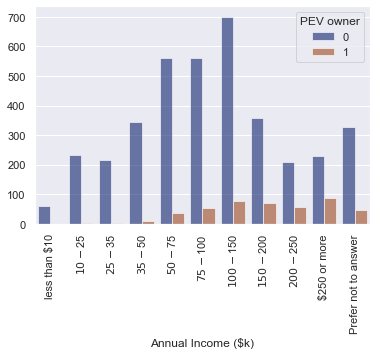

In [73]:
# Draw a nested barplot income /owner
g = sns.countplot(
    data=respondent_merged_df, 
    x="income", hue= "PEV owner",
    palette="dark", alpha=.6,
)
g.set_xticklabels(["less than $10",
"$10 - $25",
"$25 - $35",
"$35 - $50",
"$50 - $75",
"$75 - $100",
"$100 - $150",
"$150 - $200",
"$200 - $250",
"$250 or more",
"Prefer not to answer"],rotation=90)

#g.despine(left=True)
g.set(xlabel="Annual Income ($k)", ylabel = "")
#g.set_axis_labels("Annual Income($k)", " ")
#g.legend.set_title("")

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (3).

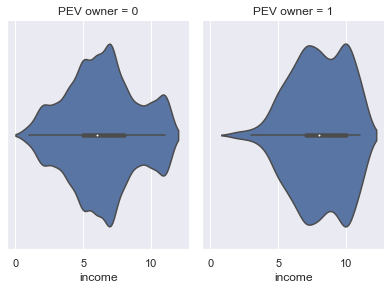

In [74]:
#Categorical distribution plots:
sns.catplot(x="income", col="PEV owner",
                data=respondent_merged_df, hue= "PEV owner",kind="violin",
            
                height=4, aspect=.7);
g.set_xticklabels(["less than $10","$50 - $75","$250 or more"])

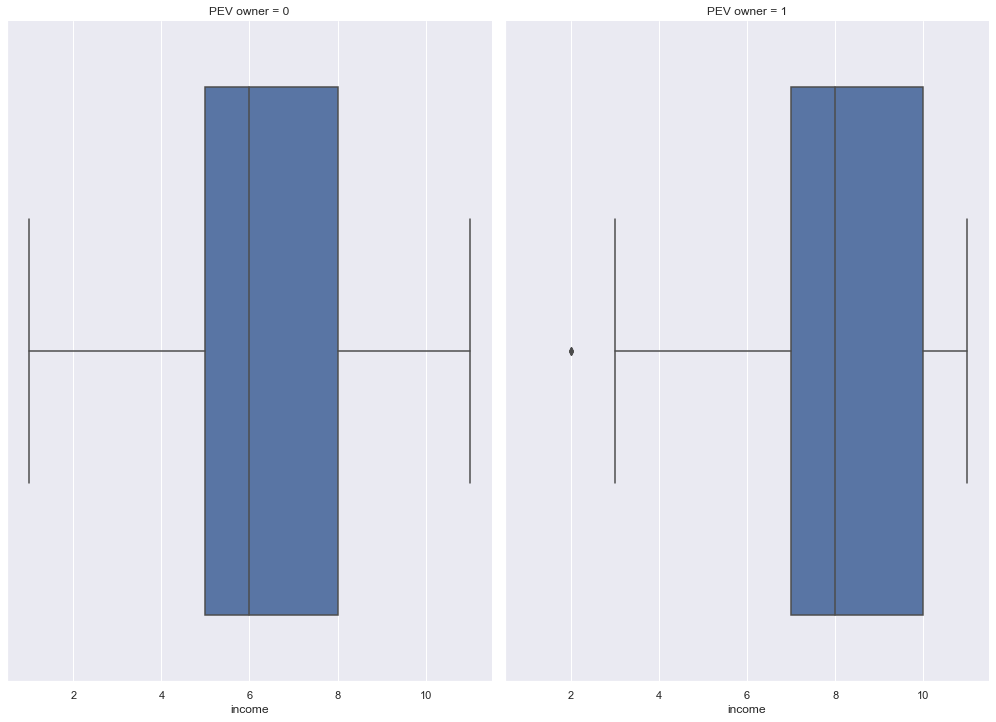

In [75]:
sns.catplot(x="income", col="PEV owner",
                data=respondent_merged_df, kind="box",
            
                height=10, aspect=.7);

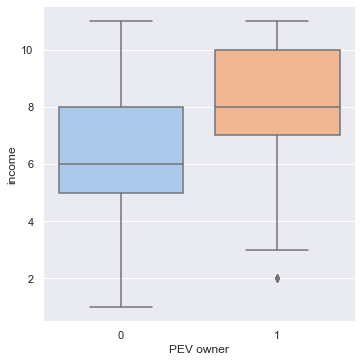

In [76]:
g= sns.catplot(x="PEV owner", y="income", kind="box",palette="pastel", data=respondent_merged_df)


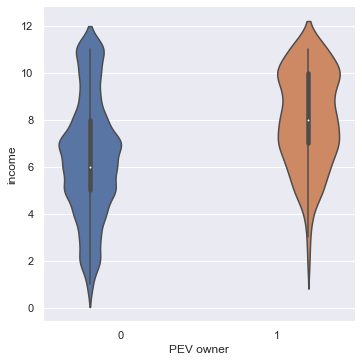

In [77]:
sns.catplot(x="PEV owner", y="income", hue="PEV owner",
            kind="violin", data=respondent_merged_df)
#Age= 2=18 to 34, 3=35 to 64, 4=65 or older

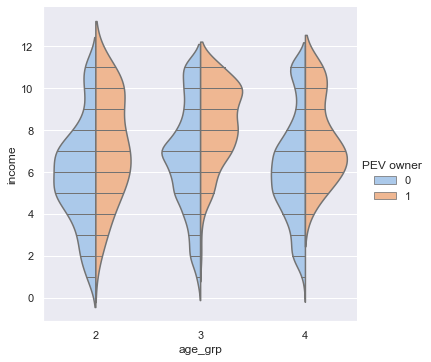

In [78]:

sns.catplot(x="age_grp", y="income", hue="PEV owner",
            kind="violin",inner="stick",split=True,palette="pastel", data=respondent_merged_df)

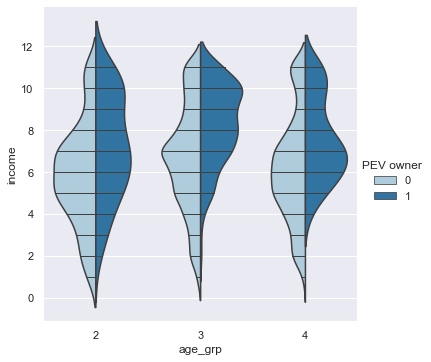

In [79]:
sns.set_palette("Paired")
sns.catplot(x="age_grp", y="income", hue="PEV owner",
            kind="violin",inner="stick",split=True,
           
            data=respondent_merged_df)


In [80]:
list(respondent_merged_df)

['sampno',
 'source',
 'language',
 'age_grp',
 'california',
 'county',
 'region',
 'future_decision_role',
 'num_hh_vehicles',
 'household_members_1',
 'household_members_2',
 'household_members_3',
 'household_members_4',
 'tot_hh_members',
 'hybrid_experience',
 'past_hybrid',
 'phev_experience',
 'past_phev',
 'bev_experience',
 'past_bev',
 'fcv_experience',
 'past_fcv',
 'charge_spots',
 'charge_work',
 'home_parking_1',
 'home_parking_2',
 'home_parking_3',
 'home_parking_4',
 'home_parking_5',
 'home_parking_6',
 'home_parking_7',
 'home_parking_8',
 'home_parking_9',
 'home_parking_8_x',
 'home_electricity_access',
 'hydrogen_station_awareness',
 'hsa_distance_1_1_x',
 'hsa_distance_1_2_x',
 'future_purchase',
 'next_purchase',
 'purchase_timing',
 'modes_used_1',
 'modes_used_2',
 'modes_used_3',
 'modes_used_4',
 'modes_used_5',
 'modes_used_6',
 'modes_used_7',
 'modes_used_8',
 'modes_used_9',
 'modes_used_10',
 'modes_used_11',
 'modes_used_12',
 'mode_freq_1',
 'mode_fr

[Text(0, 0, 'Less than high school'),
 Text(1, 0, 'High school graduate'),
 Text(2, 0, 'Tech school'),
 Text(3, 0, 'Some college'),
 Text(4, 0, 'Associate degree)'),
 Text(5, 0, 'College graduate'),
 Text(6, 0, 'Post-graduate work'),
 Text(7, 0, 'Post-graduate degree')]

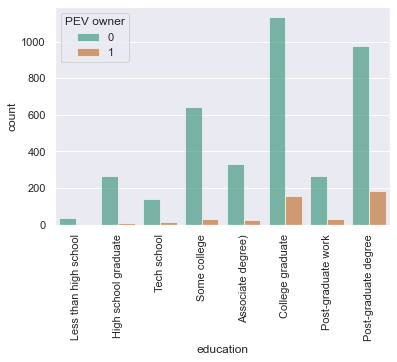

In [81]:
g=sns.countplot(
    data=respondent_merged_df, 
    x="education", hue= "PEV owner",
    palette="Dark2", alpha=0.6,
)
g.set_xticklabels(["Less than high school",
                   "High school graduate","Tech school",
"Some college","Associate degree)",
"College graduate",
"Post-graduate work",
"Post-graduate degree"],rotation=90)


In [82]:
respondent_merged_df.loc[respondent_merged_df.education==8].count()

sampno        1160
source        1160
language      1160
age_grp       1160
california    1160
              ... 
race_5        1160
race_6        1160
race_7        1160
race_6_x      1160
PEV owner     1160
Length: 112, dtype: int64

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, '')]

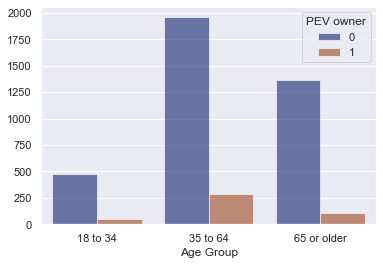

In [83]:
g=sns.countplot(
    data=respondent_merged_df, 
    x="age_grp", hue= "PEV owner",
    palette="dark", alpha=.6,
)
g.set_xticklabels(["18 to 34", "35 to 64", "65 or older"])
g.set(xlabel="Age Group", ylabel = "")

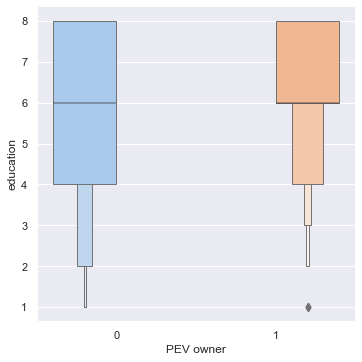

In [84]:
sns.catplot(x="PEV owner", y="education", hue="PEV owner",
            kind="boxen",palette="pastel", data=respondent_merged_df)

In [85]:
list(respondent_merged_df)

['sampno',
 'source',
 'language',
 'age_grp',
 'california',
 'county',
 'region',
 'future_decision_role',
 'num_hh_vehicles',
 'household_members_1',
 'household_members_2',
 'household_members_3',
 'household_members_4',
 'tot_hh_members',
 'hybrid_experience',
 'past_hybrid',
 'phev_experience',
 'past_phev',
 'bev_experience',
 'past_bev',
 'fcv_experience',
 'past_fcv',
 'charge_spots',
 'charge_work',
 'home_parking_1',
 'home_parking_2',
 'home_parking_3',
 'home_parking_4',
 'home_parking_5',
 'home_parking_6',
 'home_parking_7',
 'home_parking_8',
 'home_parking_9',
 'home_parking_8_x',
 'home_electricity_access',
 'hydrogen_station_awareness',
 'hsa_distance_1_1_x',
 'hsa_distance_1_2_x',
 'future_purchase',
 'next_purchase',
 'purchase_timing',
 'modes_used_1',
 'modes_used_2',
 'modes_used_3',
 'modes_used_4',
 'modes_used_5',
 'modes_used_6',
 'modes_used_7',
 'modes_used_8',
 'modes_used_9',
 'modes_used_10',
 'modes_used_11',
 'modes_used_12',
 'mode_freq_1',
 'mode_fr